<a href="https://colab.research.google.com/github/nataliawcislo/jobposting_dataset_analysis/blob/main/jobposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Baza: 
https://www.kaggle.com/rohitsahoo/data-scientist-jobs-analysis/data

https://www.kaggle.com/samruddhim/analysis-of-data-scientist-jobs/data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xg
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import pickle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  print(len(fn))

In [ ]:
# Importing libraries for analysis in alphabetical order
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go

from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# show matplotlib charts in cells
%matplotlib inline


# Set display options to not include scientific notation 
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
data_s = pd.read_csv(fn)

In [ ]:
data_s.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.50,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.50,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.00,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.40,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.40,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


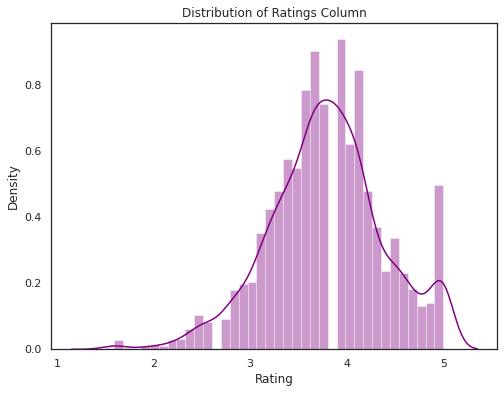

In [ ]:
data_s = data_s[data_s["Rating"]>1]
plt.subplots(figsize = (8, 6))
sns.distplot(data_s["Rating"], color = 'purple')
plt.title('Distribution of Ratings Column')
plt.show()

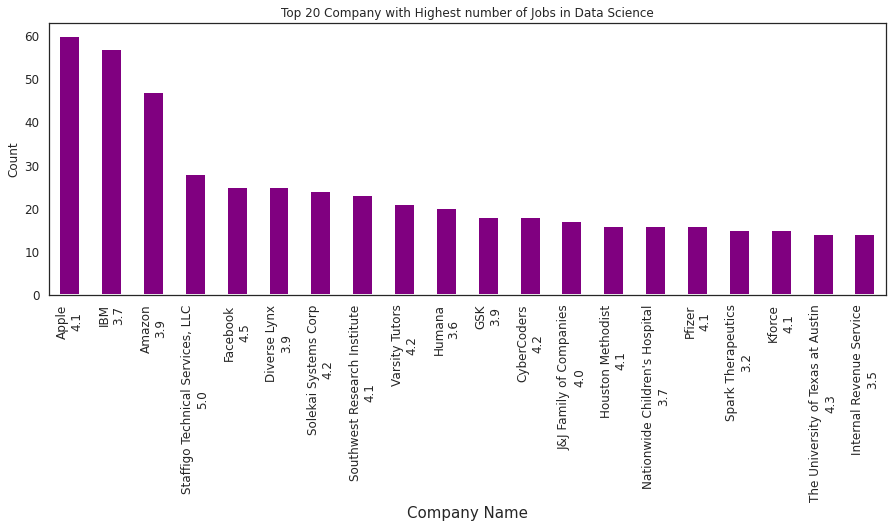

In [ ]:
plt.figure(figsize = (15,5))

data_s["Company Name"].value_counts().sort_values(ascending=False).head(20).plot.bar(color = "purple",fontsize=12, linewidth = 2)
plt.title("Top 20 Company with Highest number of Jobs in Data Science")
plt.xlabel("Company Name",fontsize=15)
plt.ylabel("Count")

plt.show()

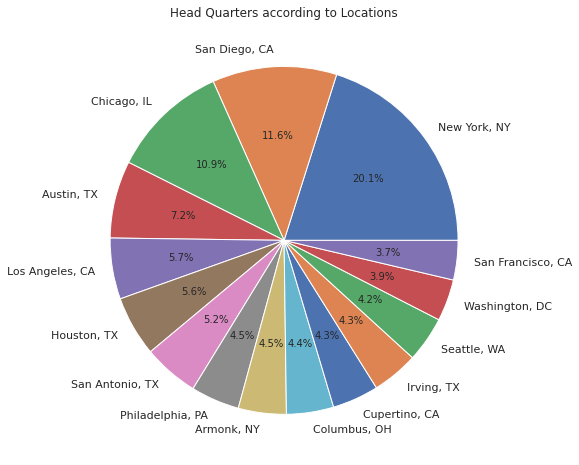

In [ ]:
plt.figure(figsize = (50,8))
data_s["Headquarters"].value_counts().sort_values(ascending=False).head(15).plot.pie(y="Headquarters",autopct="%0.1f%%")
plt.title("Head Quarters according to Locations")
plt.axis("off")
plt.show()

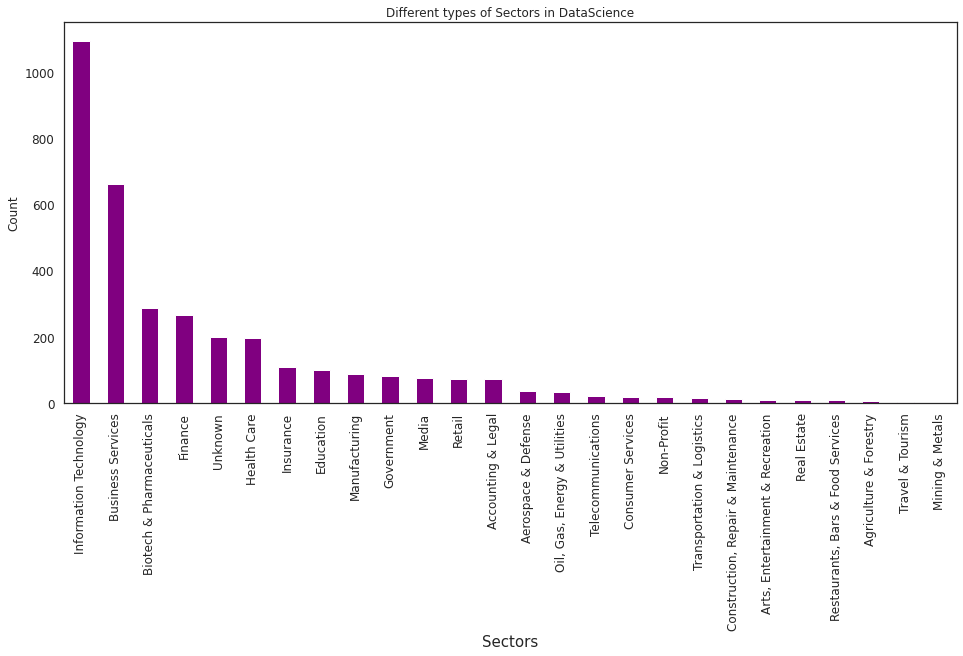

In [ ]:
data_s["Sector"] = data_s["Sector"].replace("-1", "Unknown")
plt.figure(figsize = (16,7))
data_s["Sector"].value_counts().sort_values(ascending=False).plot.bar(color= "purple",fontsize=12)
plt.title("Different types of Sectors in DataScience")
plt.xlabel("Sectors",fontsize=15)
plt.ylabel("Count")
plt.show()

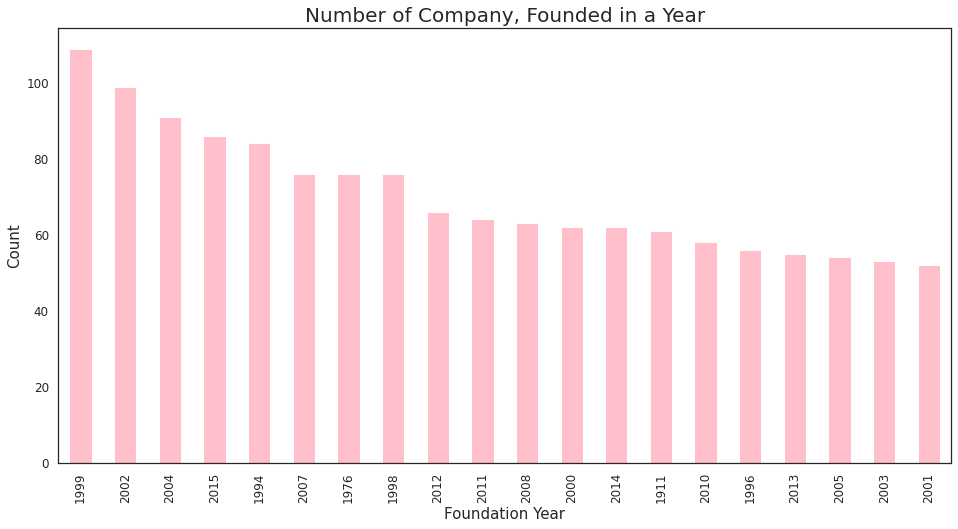

In [ ]:
plt.figure(figsize = (16,8))
data_s["Founded"].value_counts().sort_values(ascending=False)[1:21].plot.bar(color= "pink",fontsize=12)
plt.title("Number of Company, Founded in a Year",fontsize=20)
plt.xlabel("Foundation Year",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

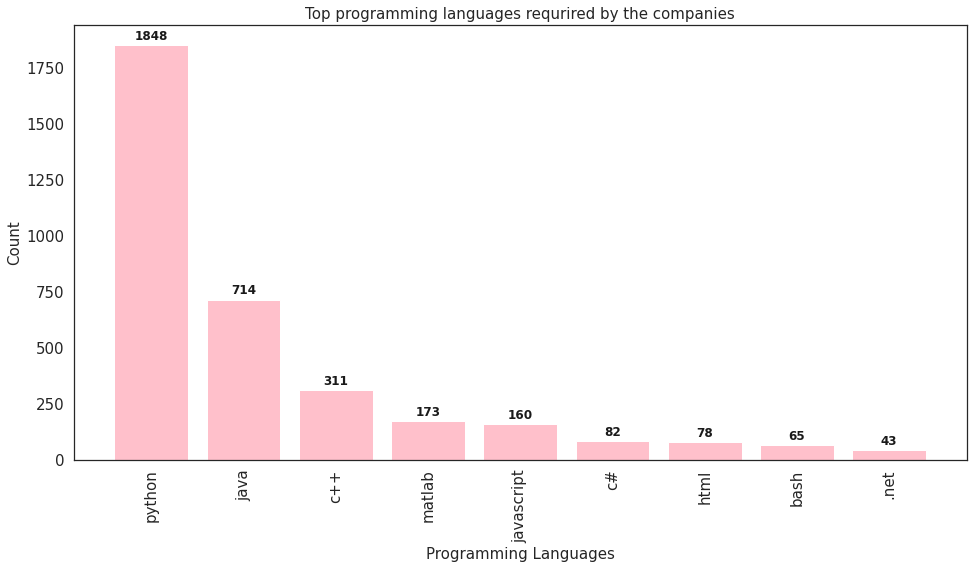

In [ ]:
from collections import defaultdict

pg_lan = ["python","c++","java","matlab",".net","c#","javascript","html","bash"]
big_data = ["big data","hadoop","spark","impala","cassandra","kafka","hdfs","hbase","hive"]
exp_edu = ["experience","bs","ms","phd","full-time","intern","remote","master","doctorate","computer science","bachelor"]
cloud = ["aws","gcp","azure","s3","redshift","ec2","lambda","route s3","dynamo db"]
ds_ml = ["time series","machine learning","regression","stat","numpy","pandas","data visualization","data analysis","time series","data cleaning","deep learning"]
other_skills = ["sql","mongo db","excel","sas","nosql","communication"]
job = data_s["Job Description"].tolist()

job = [x.lower() for x in job]

pg_lan_required = defaultdict()

for item in pg_lan:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    pg_lan_required[item] = counter

pg_lan_df = pd.DataFrame(list(pg_lan_required.items()),columns = ['Programming Langauge','count']) 
pg_lan_df.sort_values(["count"], axis=0, ascending=False, inplace=True)

plt.figure(figsize = (16,8))
x = pg_lan_df["Programming Langauge"]
y = pg_lan_df["count"]
plt.bar(x,y,color= "pink")
plt.title("Top programming languages requrired by the companies",fontsize=15)
plt.xlabel("Programming Languages",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
for k,v in pg_lan_required.items():
    plt.text(k,v+25, str(v), fontsize=12, fontweight='bold',color='k', horizontalalignment='center');

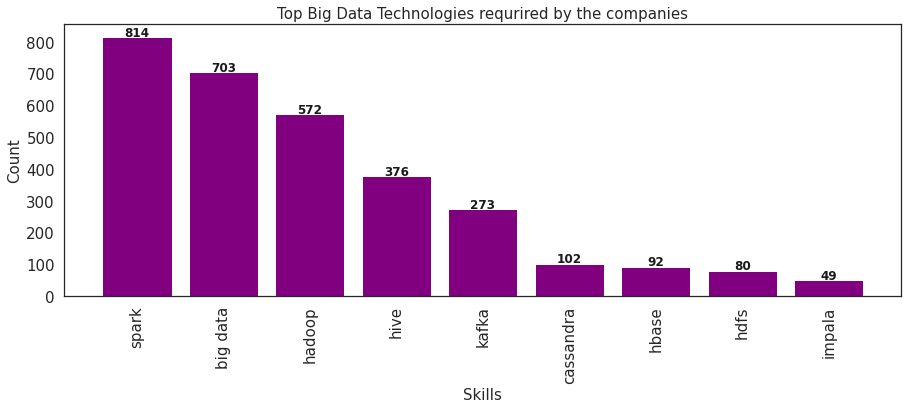

In [ ]:
counter = 0
big_data_required = defaultdict()
for item in big_data:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    big_data_required[item] = counter

big_data_df = pd.DataFrame(list(big_data_required.items()),columns = ['Big Data Technologies','count']) 
big_data_df.sort_values(["count"], axis=0, ascending=False, inplace=True)
plt.figure(figsize = (15,5))
x = big_data_df["Big Data Technologies"]
y = big_data_df["count"]
plt.bar(x,y,color= "purple")
plt.title("Top Big Data Technologies requrired by the companies",fontsize=15)
plt.xlabel("Skills",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
for k,v in big_data_required.items():
    plt.text(k,v+5, str(v), fontsize=12, fontweight='bold',color='k', horizontalalignment='center');

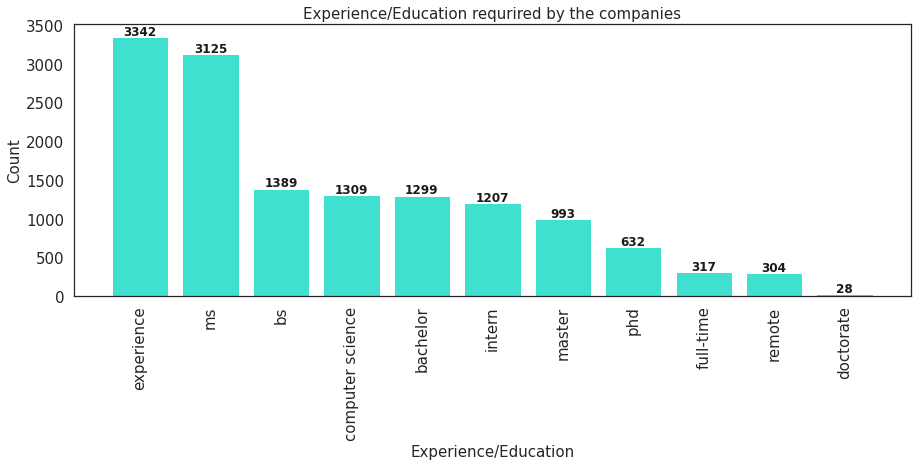

In [ ]:
exp_edu_required = defaultdict()
for item in exp_edu:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    exp_edu_required[item] = counter
    
exp_edu_df = pd.DataFrame(list(exp_edu_required.items()),columns = ['Experience/Education','count']) 
exp_edu_df.sort_values(["count"], axis=0, ascending=False, inplace=True)

plt.figure(figsize = (15,5))
x = exp_edu_df["Experience/Education"]
y = exp_edu_df["count"]
plt.bar(x,y,color= "turquoise")
plt.title("Experience/Education requrired by the companies",fontsize=15)
plt.xlabel("Experience/Education",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
for k,v in exp_edu_required.items():
    plt.text(k,v+25, str(v), fontsize=12, fontweight='bold',color='k', horizontalalignment='center');

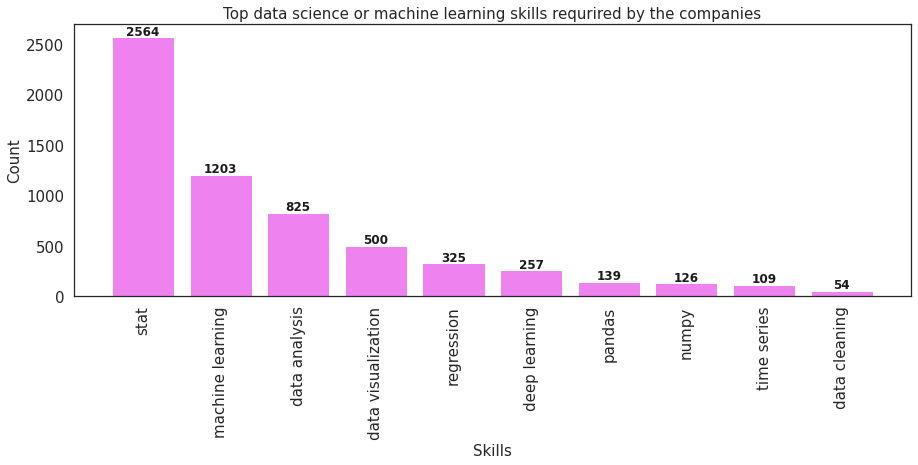

In [ ]:
counter = 0
ds_ml_required = defaultdict()
for item in ds_ml:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    ds_ml_required[item] = counter

ds_ml_df = pd.DataFrame(list(ds_ml_required.items()),columns = ['Data Science/Machine Learning Skills ','count']) 
ds_ml_df.sort_values(["count"], axis=0, ascending=False, inplace=True)

plt.figure(figsize = (15,5))
x = ds_ml_df["Data Science/Machine Learning Skills "]
y = ds_ml_df["count"]
plt.bar(x,y,color= "violet")
plt.title("Top data science or machine learning skills requrired by the companies",fontsize=15)
plt.xlabel("Skills",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
for k,v in ds_ml_required.items(): 
    plt.text(k,v+25, str(v), fontsize=12, fontweight='bold',color='k', horizontalalignment='center');

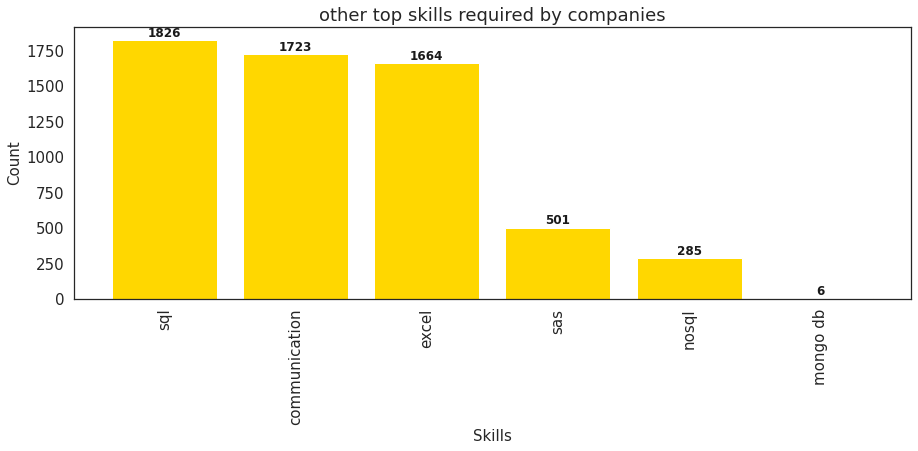

In [ ]:
counter = 0
other_skills_required = defaultdict()
for item in other_skills:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    other_skills_required[item] = counter


other_skills_df = pd.DataFrame(list(other_skills_required.items()),columns = ['Other Skills ','count']) 
other_skills_df.sort_values(["count"], axis=0, ascending=False, inplace=True)

plt.figure(figsize = (15,5))
plt.title("other top skills required by companies", fontsize=18)
plt.bar(other_skills_df["Other Skills "], other_skills_df["count"],color= "gold")
plt.xlabel("Skills",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
for k,v in other_skills_required.items(): 
    plt.text(k,v+25, str(v), fontsize=12, fontweight='bold',color='k', horizontalalignment='center');

In [ ]:
# df_sal = data_s.groupby('Location')[['Salary Estimate Upper Bound','Salary Estimate Lower Bound']].mean().sort_values(['Salary Estimate Upper Bound','Salary Estimate Lower Bound'],ascending=False)[0:30]
# df_sal.plot(kind="barh", figsize=(16,17), width=0.8)
# plt.ylabel("Location")
# plt.xlabel("Salary")
# plt.title("Min and Max Salary From Different Location", fontweight="bold")

# for index, value in enumerate(df_sal["Salary Estimate Upper Bound"]):
#     plt.text(value + 0.5, index - 0.4, str(value))
    
    
# for index, value in enumerate(df_sal["Salary Estimate Lower Bound"]):
#     plt.text(value + 0.2, index + 0.1, str(value))

In [ ]:
# df_sal = data_s.groupby('Job Title')[['Salary Estimate Upper Bound','Salary Estimate Lower Bound']].mean().sort_values(['Salary Estimate Upper Bound','Salary Estimate Lower Bound'],ascending=False)[:30]
# df_sal.plot(kind="barh", figsize=(16,17), width=0.8)
# plt.ylabel("Job Title")
# plt.xlabel("Salary")
# plt.title("Min and Max Salary of different Job Title", fontweight="bold")

# for index, value in enumerate(df_sal["Salary Estimate Upper Bound"]):
#     plt.text(value + 0.5, index - 0.4, str(value))
    
    
# for index, value in enumerate(df_sal["Salary Estimate Lower Bound"]):
#     plt.text(value + 0.2, index + 0.1, str(value))

In [ ]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3490 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3490 non-null   int64  
 1   index              3490 non-null   int64  
 2   Job Title          3490 non-null   object 
 3   Salary Estimate    3490 non-null   object 
 4   Job Description    3490 non-null   object 
 5   Rating             3490 non-null   float64
 6   Company Name       3490 non-null   object 
 7   Location           3490 non-null   object 
 8   Headquarters       3490 non-null   object 
 9   Size               3490 non-null   object 
 10  Founded            3490 non-null   int64  
 11  Type of ownership  3490 non-null   object 
 12  Industry           3490 non-null   object 
 13  Sector             3490 non-null   object 
 14  Revenue            3490 non-null   object 
 15  Competitors        3490 non-null   object 
 16  Easy Apply         3490 

In [ ]:
#Remove the columns
data_s.drop(['Unnamed: 0', 'index', 'Rating', 'Sector','Revenue','Competitors','Easy Apply'], axis=1, inplace=True)

In [ ]:
data_s.head()

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness"
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing
5,Data Scientist,$111K-$181K (Glassdoor est.),Job Brief\n\nThe ideal candidate will have pre...,IFG Companies\n2.9,"New York, NY","Hartford, CT",201 to 500 employees,1985,Company - Private,Insurance Carriers


In [ ]:
data_s = data_s.drop(data_s.index[data_s['Founded']== -1])
data_s = data_s.drop(data_s.index[data_s['Industry']== -1])
data_s.dropna()
data_s.info()
data_s.head()
print(len(data_s))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2899 entries, 0 to 3906
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Title          2899 non-null   object
 1   Salary Estimate    2899 non-null   object
 2   Job Description    2899 non-null   object
 3   Company Name       2899 non-null   object
 4   Location           2899 non-null   object
 5   Headquarters       2899 non-null   object
 6   Size               2899 non-null   object
 7   Founded            2899 non-null   int64 
 8   Type of ownership  2899 non-null   object
 9   Industry           2899 non-null   object
dtypes: int64(1), object(9)
memory usage: 329.1+ KB
2899


In [ ]:
data_s

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness"
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing
5,Data Scientist,$111K-$181K (Glassdoor est.),Job Brief\n\nThe ideal candidate will have pre...,IFG Companies\n2.9,"New York, NY","Hartford, CT",201 to 500 employees,1985,Company - Private,Insurance Carriers
...,...,...,...,...,...,...,...,...,...,...
3902,Columbus Data Science Tutor Jobs,$55K-$112K (Glassdoor est.),#Columbus Data Science Tutor Jobs\n\nVarsity T...,Varsity Tutors\n4.2,"Columbus, OH","Saint Louis, MO",201 to 500 employees,2007,Company - Private,Internet
3903,Cyber Security Data Engineer,$55K-$112K (Glassdoor est.),ApTask is a leading staffing and recruitment c...,ApTask\n3.9,"Dublin, OH","Iselin, NJ",201 to 500 employees,2010,Company - Private,IT Services
3904,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\n\nTachyon Technologies is a Digital ...,Tachyon Technologies\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services
3905,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\nInterpret data, analyze resul...","Staffigo Technical Services, LLC\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services


In [ ]:
data_s.rename(columns={"Job Description": "Description"}, inplace=True)

In [ ]:
# #Replacing -1 with nan
# data_s["Size"] = data_s["Size"].replace("Unknown", -1)
# data_s.replace(['-1'], [np.nan], inplace=True)
# data_s.replace(['-1.0'], [np.nan], inplace=True)
# data_s.replace([-1], [np.nan], inplace=True)

# data_s.isnull().sum()
# data_s.head()

In [ ]:
#separate columns of Salary Estimate as minimum and maximum salary

df_salary = data_s['Salary Estimate'].str.split("-",expand=True,)

minimum_salary = df_salary[0]
minimum_salary = minimum_salary.str.replace('K','000')


maximum_salary = df_salary[1].str.replace('(Glassdoor est.)', ' ')
maximum_salary = maximum_salary.str.replace('(', ' ')
maximum_salary = maximum_salary.str.replace(')', ' ')
maximum_salary = maximum_salary.str.replace('K', '000')
maximum_salary = maximum_salary.str.replace('Employer est.', ' ')
maximum_salary = maximum_salary.str.replace('Per Hour', ' ')

maximum_salary = maximum_salary.str.replace('$', ' ').fillna(0).astype(int)
minimum_salary = minimum_salary.str.replace('$', ' ').fillna(0).astype(int)

In [ ]:
data_s['Minimum Salary'] = minimum_salary
data_s['Maximum Salary'] = maximum_salary

In [ ]:
import re

HOURS_PER_WEEK = 40
WEEKS_PER_YEAR = 52
THOUSAND = 1000

def return_digits(x):
    result = re.findall(r'\d+', str(x))
    result = int(result[0]) if result else 0
    return result

def return_salary(string, isFrom):
    patternMain = None
    patternPerHour = None
    if(isFrom):
        patternMain = r'^\$\d+K';
        patternPerHour = r'^\$\d+';
    else:
        patternMain = r'-\$\d+K';
        patternPerHour = r'-\$\d+';
    
    result = None
    if('Per Hour' in string):
        result = re.findall(patternPerHour, str(string))
        result = return_digits(result[0]) if result else 0
        result = result * HOURS_PER_WEEK * WEEKS_PER_YEAR
    else:
        result = re.findall(patternMain, str(string))
        result = return_digits(result[0]) if result else 0
        result = result * THOUSAND
    return result

def return_average_salary(x):
    from_salary = return_salary(x, True)
    to_salary = return_salary(x, False)
    result = (from_salary+to_salary)/2
    return result

data_s['SalaryAverage'] =  data_s['Salary Estimate'].apply(return_average_salary)


data_s.head()

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Minimum Salary,Maximum Salary,SalaryAverage
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,111000,181000,146000.00
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",111000,181000,146000.00
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,111000,181000,146000.00
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,111000,181000,146000.00
5,Data Scientist,$111K-$181K (Glassdoor est.),Job Brief\n\nThe ideal candidate will have pre...,IFG Companies\n2.9,"New York, NY","Hartford, CT",201 to 500 employees,1985,Company - Private,Insurance Carriers,111000,181000,146000.00


In [ ]:
# data_s['Company Name'] = data_s['Company Name'].str.replace('\n.*', ' ')

In [ ]:
maximum_salary.value_counts()

144000    85
175000    76
151000    74
152000    66
80000     65
          ..
173000     5
185000     3
53         3
26         3
74000      1
Name: 1, Length: 97, dtype: int64

In [ ]:
# cleaning  position name in job title
data_s['Job Title'] = data_s['Job Title'].str.replace('Sr.', 'Senior')
data_s['Job Title'] = data_s['Job Title'].str.replace('SeniorData Analyst', 'Senior Data Analyst')
data_s['Job Title'] = data_s['Job Title'].str.replace('SeniorData Scientist', 'Senior Data Scientist')
data_s['Job Title'] = data_s['Job Title'].str.replace('12 month Roster', ' ')
data_s['Job Title'] = data_s['Job Title'].str.replace('Direct Hire', ' ')

In [ ]:
# categorization for company sizes
small =  ["1 to 50 employees", "51 to 200 employees"]
medium = ["201 to 500 employees", '501 to 1000 employees']
large = ['10000+ employees', '1001 to 5000 employees', '5001 to 10000 employees']


#small
data_s["Size"] = data_s["Size"].replace(small, "Small") 
#Medium
data_s["Size"] = data_s["Size"].replace(medium, "Medium")
#Large
data_s["Size"] = data_s["Size"].replace(large, "Large")

In [ ]:
#Cleaning the Size column
data_s["Size"].value_counts()


Large      1690
Medium      608
Small       596
Unknown       5
Name: Size, dtype: int64

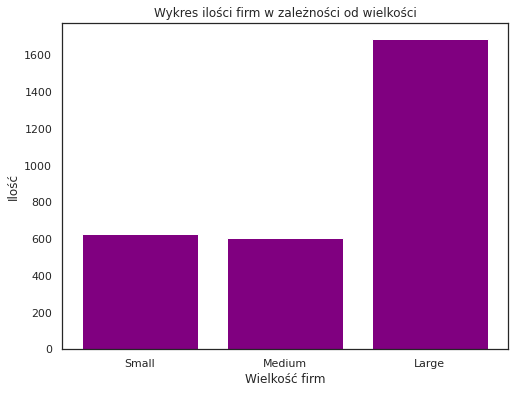

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('ggplot')

x = ['Small', 'Medium', 'Large']
energy = [628, 608, 1690]

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize = (8,6))
plt.bar(x_pos, energy, color='purple')
plt.xlabel("Size of compony")
plt.ylabel("Quantity jobposting")
plt.title("Number of companies depending on the size")

plt.xticks(x_pos, x)

plt.show()

In [ ]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2899 entries, 0 to 3906
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2899 non-null   object 
 1   Salary Estimate    2899 non-null   object 
 2   Job Description    2899 non-null   object 
 3   Company Name       2899 non-null   object 
 4   Location           2899 non-null   object 
 5   Headquarters       2899 non-null   object 
 6   Size               2899 non-null   object 
 7   Founded            2899 non-null   int64  
 8   Type of ownership  2899 non-null   object 
 9   Industry           2899 non-null   object 
 10  Minimum Salary     2899 non-null   int64  
 11  Maximum Salary     2899 non-null   int64  
 12  SalaryAverage      2899 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 397.1+ KB


In [ ]:
# groub by title and number of posts and get only the top 50
title_list = data_s.groupby(by=['Job Title'], as_index=False).agg({'Company Name' :'count'}).sort_values(by=['Company Name'], ascending=False).head(50)

# rename company name to Number of posts
title_list.rename(columns={"Company Name": "Number of Posts"}, inplace=True)
title_list

,Job Title,Number of Posts
392,Data Engineer,176
510,Data Scientist,162
298,Data Analyst,162
1357,Senior Data Scientist,101
1320,Senior Data Analyst,53
1337,Senior Data Engineer,41
173,Business Intelligence Analyst,30
898,Machine Learning Engineer,30
127,Big Data Engineer,28
874,Lead Data Scientist,22


In [ ]:
# groub by title and number of posts and get only the top 10
by_location = data_s.groupby(by=['Location'], as_index=False).agg({'Company Name' :'count'}).sort_values(by=['Company Name'], ascending=False).head(50)

# rename company name to Number of posts
by_location.rename(columns={"Company Name": "Number of Posts"}, inplace=True)
by_location


,Location,Number of Posts
27,"Chicago, IL",262
4,"Austin, TX",261
98,"New York, NY",229
127,"San Diego, CA",209
78,"Los Angeles, CA",152
62,"Houston, TX",147
112,"Philadelphia, PA",135
113,"Phoenix, AZ",126
125,"San Antonio, TX",126
30,"Columbus, OH",125


In [ ]:
list = ['Chicago', 'Austin', 'New York', 'San Diego', 'Los Angeles']
        
#         IL	265
# 4	Austin, TX	264
# 100	New York, NY	232
# 129	San Diego, CA	214
# 80	Los Angeles, CA	153
# 64	Houston, TX	148
# 114	Philadelphia, PA	135
# 127	San Antonio, TX	128
# 115	Phoenix, AZ	126
# 31	Columbus, OH	125
# 37	Dallas, TX	119
# 131	San Jose, CA	84
# 65	Irving, TX	83
# 132	Santa Clara, CA	61
# 68	Jacksonville, FL	47
# 145	Tempe, AZ	37
# 116	Plano, TX	37
# 97	Mountain View, CA	33
# 121	Redwood City, CA	30
# 108	Palo Alto, CA	30
# 52	Fort Worth, TX	28
# 26	Chandler, AZ	22
# 90	Menlo Park, CA	22
# 135	Scottsdale, AZ	22
# 72	La Jolla, CA	20
# 144	Sunnyvale, CA	20
# 133	Santa Monica, CA	20
# 17	Burbank, CA	19
# 43	El Segundo, CA	18
# 3	Arlington, TX	16
# 34	Culver City, CA	12
# 156	West Point, PA	12
# 30	Collegeville, PA	11
# 84	Malvern, PA	10
# 122	Richardson, TX	9
# 164	Wilmington, DE	9
# 70	King of Prussia, PA	9
# 110	Pasadena, CA	8
# 54	Fremont, CA	7
# 57	Glendale, CA	7
# 75	Lewisville, TX	7
# 105	Northbrook, IL	7
# 35	Cupertino, CA	7
# 36	DC Ranch, AZ	7
# 32	Conshohocken, PA	7
# 137	Spring House, PA	6
# 39	Downers Grove, IL	5
# 69	Jersey City, NJ	5
# 101	Newark, CA	5
# 51	Fort Washington, PA	5

In [ ]:
!pip install conda
!pip install Basemap

     |████████████████████████████████| 299 kB 4.1 MB/s 
     |████████████████████████████████| 66 kB 3.7 MB/s 
     |████████████████████████████████| 109 kB 61.1 MB/s 
     |████████████████████████████████| 546 kB 55.8 MB/s 
  Created wheel for conda: filename=conda-4.3.16-py3-none-any.whl size=336960 sha256=ba8f18167324b7324eeddfd4ccb892531501eb97b3ce2ca67d89ffdcc8d92c83
  Stored in directory: /root/.cache/pip/wheels/66/ec/2c/cce33d7a071720882d948fd3364d3ff5562bac9e5638768d41
  Created wheel for pycosat: filename=pycosat-0.6.3-cp37-cp37m-linux_x86_64.whl size=143870 sha256=d47326cc7eebd27e58f3af775529d761b9a60139aa8bdc566c611f7697c310b4
  Stored in directory: /root/.cache/pip/wheels/c8/29/0e/a226b7c5a4f24e246f25201c0b1fbf6fb8f19f9cce89b02c36
Successfully built conda pycosat
     |████████████████████████████████| 862 kB 4.4 MB/s 
     |████████████████████████████████| 219 kB 56.4 MB/s 
     |████████████████████████████████| 6.3 MB 43.7 MB/s 
     |███████████████████████████████

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap

# ax = df_world["geometry"].boundary.plot(figsize=(20,16))
# df_world_teams.plot( column=list, ax=ax, cmap='OrRd', 
#                      legend=True, legend_kwds={"label": "Participation", "orientation":"horizontal"})

# fig = plt.figure(figsize=(8, 8))
# m = Basemap(projection='lcc', resolution=None,
#             width=8E6, height=8E6, 
#             lat_0=45, lon_0=-100,)
# m.etopo(scale=0.5, alpha=0.5)

# # Map (long, lat) to (x, y) for plotting
# x, y = m(-122.3, 47.6)
# plt.plot(x, y, 'ok', markersize=5)
# plt.text(x, y, ' by_location', fontsize=12);

In [ ]:
by_title = data_s.groupby(by=['Job Title'], as_index=False).agg({'Company Name' :'count'}).sort_values(by=['Company Name'], ascending=False).head(10)

by_title.rename(columns={"Company Name": "Number of Posts"}, inplace=True)
by_title

,Job Title,Number of Posts
392,Data Engineer,176
510,Data Scientist,162
298,Data Analyst,162
1357,Senior Data Scientist,101
1320,Senior Data Analyst,53
1337,Senior Data Engineer,41
173,Business Intelligence Analyst,30
898,Machine Learning Engineer,30
127,Big Data Engineer,28
874,Lead Data Scientist,22


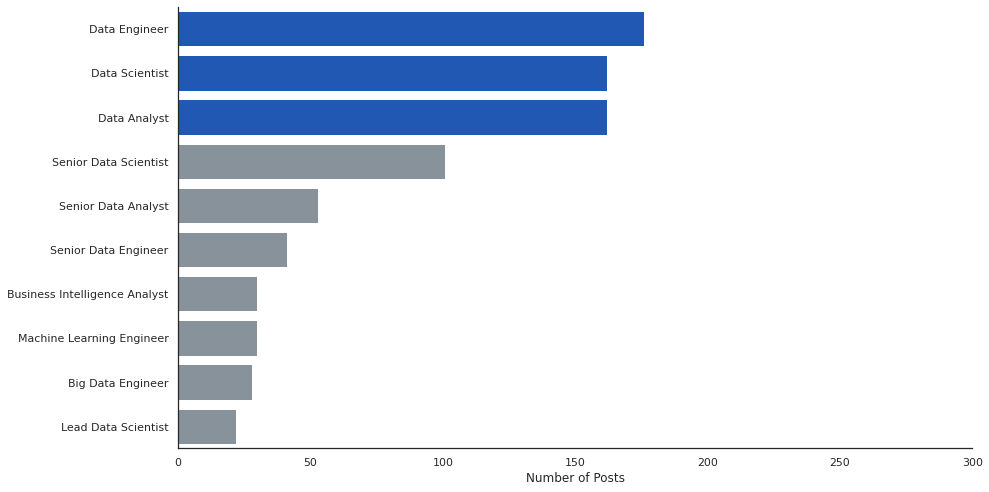

In [ ]:
# choosing colors
top_color = "#0952CB"
none_top_color = "#85929E"
# set the background to white
sns.set_theme(style="white")
# create chart and adding palette colors on top 3
chart = sns.catplot(
    data=by_title, 
    x="Number of Posts", 
    y='Job Title', 
    kind="bar",
    height= 7,
    aspect=2,
    legend=False,
    palette={
      "Data Scientist": top_color,
      "Data Engineer" : top_color,
      "Data Analyst":   top_color,
      "Senior Data Scientist": none_top_color,
      "Senior Data Analyst"	: none_top_color,
      "Senior Data Engineer"	: none_top_color,
      "Machine Learning Engineer"	: none_top_color,
      "Big Data Engineer"	: none_top_color,
      "Business Intelligence Analyst"	: none_top_color,
      "Lead Data Scientist": none_top_color
        }  
    )
chart.set(ylabel=None, xlim=(0,300))

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create a list of word and navigate what colomn
text= data_s.Description[0]

# 
wordcloud = WordCloud(
    background_color="white",  
    max_words=2000, # set it to 2000 words
    colormap='Dark2', # choosing color set
    height=1500, 
    width=3000,

# stoping some words that do not have meanining
    stopwords=['experience', 'or', 'for', 'and', 'with', 'of', 'such', 'at', 'to', 'from', 'in', 'over', 'as', 'our', 'is', 'by', 'day', 'about', 'the','years' 'travel', 'book', 'booking', 'following', 'candidates', 'big', 'background','developing', 'characteristics', 'data', 'team', 'data', 'scientist', 'strong', 'project', 
                  'solution', 'technology', 'science', 'model', 'knowledge','skill', 'work', 'build', 'will', 'knowledge', 'application','gender', 'identity', 'equal',
                  'opportunity','related','field', 'without', 'regard', 'national', 'origin', 'religion', 'sex', 'race', 'color', 'veteran', 'status','sexual',
                  'orientation','opportunity', 'employer', 'qualified','applicant','skills', 'job', 'summary', 'advanced', 'system', 'applicants', 'receive', 'large', 'best', 'practice', 'problem'
                 , 'processing', 'affirmative', 'action', 'employment', 'consideration', 'receive', 'united', 'state', 'programming', 'computer', 'working', 'saying', 
                  'preferred', 'qualification', 'disability', 'protected', 'structured', 'unstructured', 'problems', 'technical', 'internal', 'external', 'non',
                 'subject', 'matter', 'please', 'apply', 'using', 'dental', 'reasonable', 'accomodation', 'join', 'us', 'tools', 'individuals', 'disabilities'
                 , 'type', 'full', 'wide', 'range', 'duties', 'responsibilities', 'stakeholder', 'oral', 'written', 'ideal', 'candidate', 'ability', 'qualifications', 'well',
                  'must', 'able', 'unit', 'member', 'posted', 'today', 'service', 'clearance', 'days', 'ago', 'high', 'quality', 'level', 'every', 'use', 'case', 'additional']
               
               ).generate(str(text))
                       
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

AttributeError: ignored

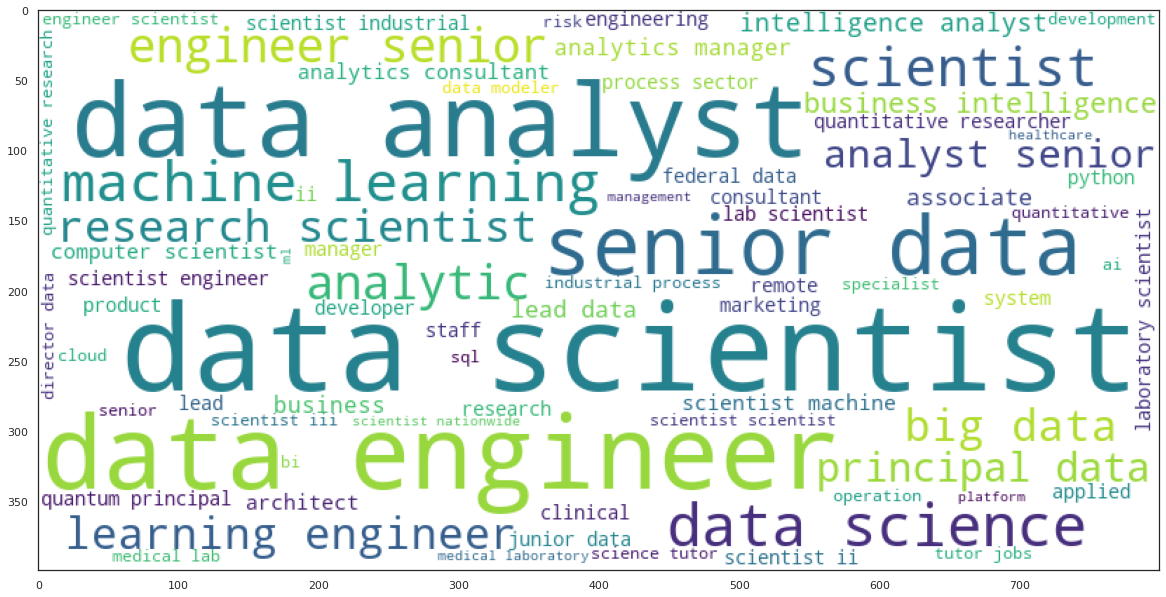

In [ ]:
import textwrap
from wordcloud import WordCloud, STOPWORDS 

comment_words = ''
stopwords = set(STOPWORDS)

for val in data_s['Job Title']:
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white'
                      , stopwords = stopwords, min_font_size = 10).generate(comment_words)

fig, ax = plt.subplots(figsize = (16, 16))
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
plt.show()


<function matplotlib.pyplot.show>

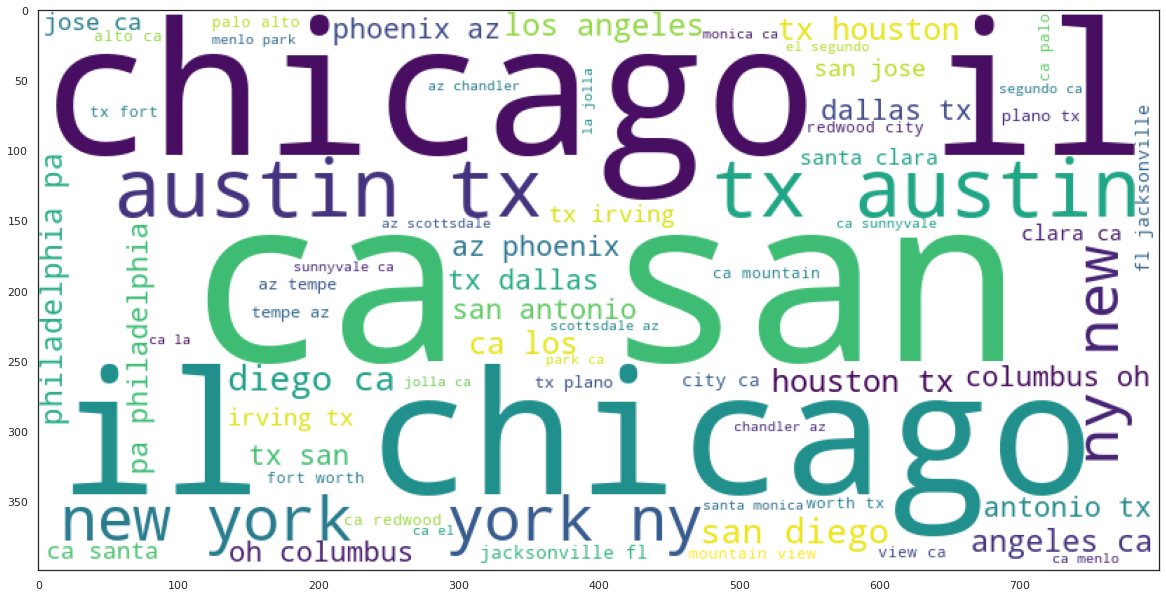

In [ ]:
import textwrap
from wordcloud import WordCloud, STOPWORDS 

comment_words = ''
stopwords = set(STOPWORDS)

for val in data_s['Location']:
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white'
                      , stopwords = stopwords, min_font_size = 10).generate(comment_words)

fig, ax = plt.subplots(figsize = (16, 16))
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
plt.show



In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create a list of word and navigate what colomn
text= data_s.Description[0]

# 
wordcloud = WordCloud(
    background_color="white",  
    max_words=2000, # set it to 2000 words
    colormap='Dark2', # choosing color set
    height=1500, 
    width=3000,

# stoping some words that do not have meanining
    stopwords=[''] ).generate(str(text))
                       
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()



AttributeError: ignored

In [ ]:
data_s.head()

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Minimum Salary,Maximum Salary,SalaryAverage
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",Hopper\n3.5,"New York, NY","Montreal, Canada",Medium,2007,Company - Private,Travel Agencies,111000,181000,146000.00
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",Noom US\n4.5,"New York, NY","New York, NY",Large,2008,Company - Private,"Health, Beauty, & Fitness",111000,181000,146000.00
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",Medium,2019,Company - Private,Internet,111000,181000,146000.00
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",United Entertainment Group\n3.4,"New York, NY","New York, NY",Small,2007,Company - Private,Advertising & Marketing,111000,181000,146000.00
5,Data Scientist,$111K-$181K (Glassdoor est.),Job Brief\n\nThe ideal candidate will have pre...,IFG Companies\n2.9,"New York, NY","Hartford, CT",Medium,1985,Company - Private,Insurance Carriers,111000,181000,146000.00


In [ ]:
requirements = {"powerbi":0, " r ":0, "tableau":0, "qlikview":0, "python":0, "sql":0, "machine learning":0,'linux':0, 'c#':0, "ml ":0, "hive":0, "spark":0, "hadoop":0, "java":0, "scala":0, "kafka":0, "bachelor":0, "master":0, "phd":0, 'year':0, 'years':0,  "c++":0, 'statistical computer languages':0, 'PhD':0, 'Ph.D':0}

for i in range(len(data_s)):
    Description = data_s.Description[i].lower().replace("\n", " ")
    for k in requirements:
        if k in Description:
            requirements[k] += 1
requirements['machine learning'] += requirements[' ml ']
requirements['year'] += requirements['years']
requirements['years experience'] = requirements.pop('year')
del requirements['years']
del requirements[' ml ']

from collections import OrderedDict
sorted_req = OrderedDict(sorted(requirements.items(), key=lambda x:x[1]))
plt.figure(figsize=(10, 10))
plt.bar(range(len(sorted_req)), list(sorted_req.values()), align='center')
plt.xticks(range(len(sorted_req)), list(sorted_req.keys()), rotation='vertical')
plt.xlabel("job requirement")
plt.ylabel("Number of posts")
plt.show()


AttributeError: ignored

<function matplotlib.pyplot.show>

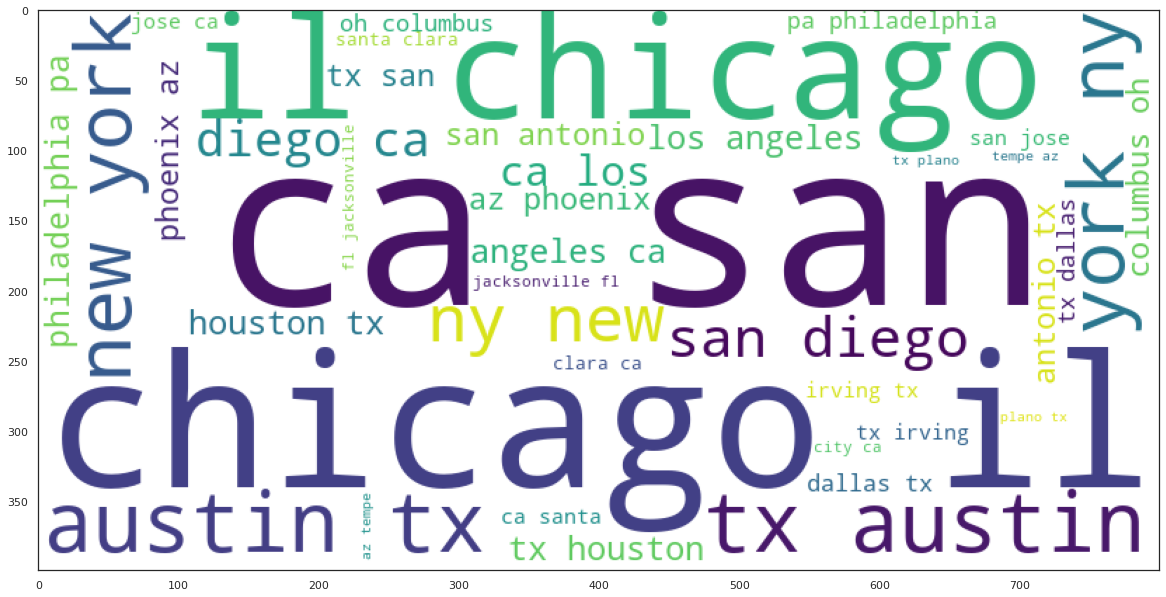

In [ ]:
import textwrap
from wordcloud import WordCloud, STOPWORDS 

comment_words = ''
stopwords = set(STOPWORDS)

for val in data_s['Location']:
    val = str(val)
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 400, background_color = 'white'
                      , stopwords = stopwords, min_font_size = 10).generate(comment_words)

fig, ax = plt.subplots(figsize = (16, 16))
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
plt.show

In [ ]:
juniorData =  data_s[data_s['Job Title'].str.contains("Junior")|data_s['Job Title'].str.contains("Jr.")]
print(len(juniorData))
juniorData.head()

40


,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Minimum Salary,Maximum Salary,SalaryAverage
334,Junior Data Scientist,$102K-$164K (Glassdoor est.),ResponsibilitiesSummaryThe Junior Data Scienti...,NBC Universal\n3.8,"Universal City, CA","New York, NY",Large,1906,Company - Public,TV Broadcast & Cable Networks,102000,164000,133000.00
473,Junior Data Analyst,$134K-$218K (Glassdoor est.),Job Description\nJob description\nInterpret da...,"Staffigo Technical Services, LLC\n5.0","Los Angeles, CA","Woodridge, IL",Small,2008,Company - Private,IT Services,134000,218000,176000.00
642,Associate Scientist - Sensory - Jr (Daily/Week...,$113K-$184K (Glassdoor est.),Job Description\n\n\nJob #: 1076379\n\nSensory...,Apex Systems\n3.8,"Torrance, CA","Glen Allen, VA",Large,1995,Subsidiary or Business Segment,Staffing & Outsourcing,113000,184000,148500.00
676,Data Analyst Junior,$136K-$164K (Glassdoor est.),Job Description\nJob description\nInterpret da...,"Staffigo Technical Services, LLC\n5.0","Los Angeles, CA","Woodridge, IL",Small,2008,Company - Private,IT Services,136000,164000,150000.00
768,Junior Data Analyst,$91K-$105K (Glassdoor est.),"Job Description\nJunior Data Analyst: Chicago,...",Circle Logistics\n3.7,"Chicago, IL","Fort Wayne, IN",Medium,2011,Company - Private,Transportation Management,91000,105000,98000.00


Text(0.5, 1.0, 'Średnie wynagrodzenia Juniora z obszaru Data Science')

<Figure size 432x288 with 0 Axes>

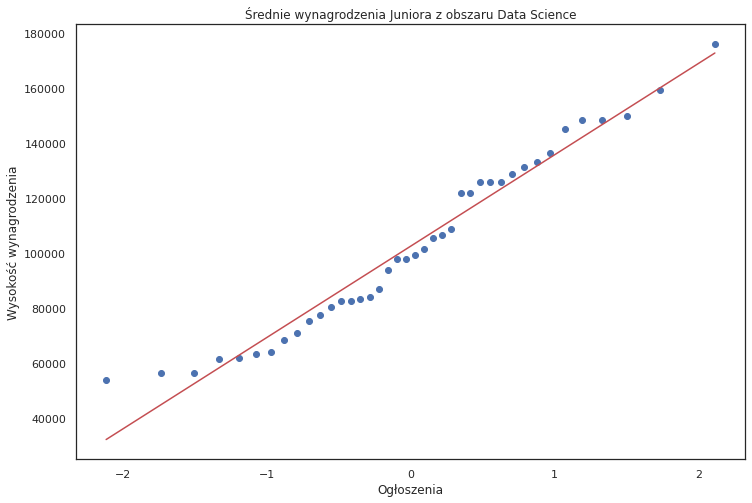

In [ ]:
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import normaltest
from scipy.stats import norm
from scipy import stats

fig = plt.figure()
plt.subplots(figsize = (12, 8))
res = stats.probplot(juniorData['SalaryAverage'], plot=plt)

plt.xlabel("Ogłoszenia")
plt.ylabel("Wysokość wynagrodzenia")
plt.title("Średnie wynagrodzenia Juniora z obszaru Data Science")


[Text(0.5, 1.0, 'Średnie wynagrodzenia Juniora')]

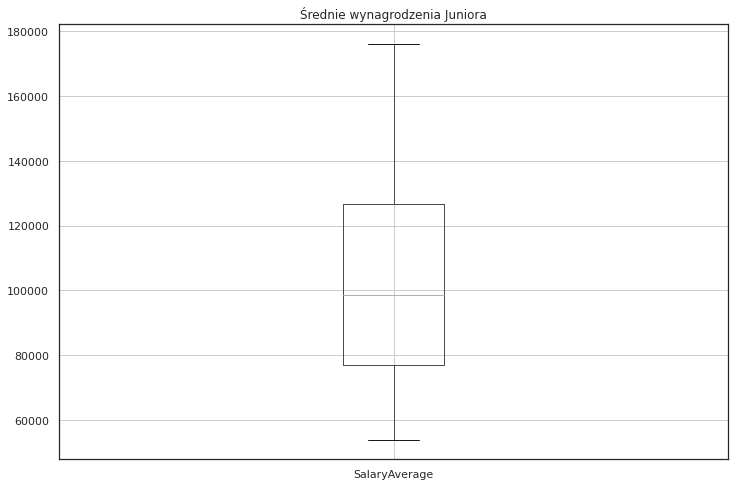

In [ ]:
plt.subplots(figsize = (12, 8))
juniorData.boxplot(column=['SalaryAverage']).set(title='Średnie wynagrodzenia Juniora')

537


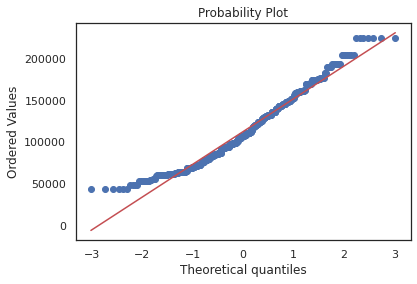

In [ ]:
seniorData =  data_s[data_s['Job Title'].str.contains("Senior")|data_s['Job Title'].str.contains("Sr.")]
print(len(seniorData))

fig = plt.figure()
res = stats.probplot(seniorData['SalaryAverage'], plot=plt)


In [ ]:
seniorData.boxplot(column=['SalaryAverage'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

No handles with labels found to put in legend.


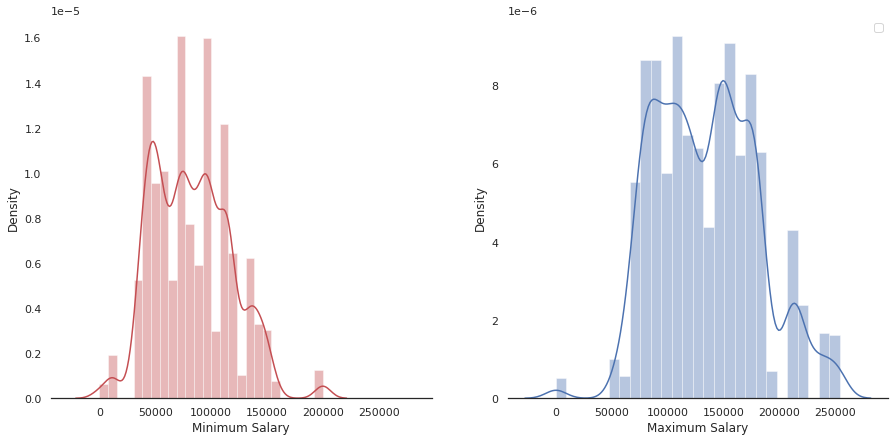

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=True)
sns.despine(left=True)
sns.distplot(data_s['Minimum Salary'],color = 'r',ax = axes[0])
sns.distplot(data_s['Maximum Salary'],ax = axes[1])
plt.legend();

Prediction

In [ ]:
data_s.drop(['Salary Estimate','SalaryAverage'], axis=1, inplace=True)
data_s.head()

,Job Title,Description,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Minimum Salary,Maximum Salary
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",Hopper\n3.5,"New York, NY","Montreal, Canada",Medium,2007,Company - Private,Travel Agencies,111000,181000
1,"Data Scientist, Product Analytics","At Noom, we use scientifically proven methods ...",Noom US\n4.5,"New York, NY","New York, NY",Large,2008,Company - Private,"Health, Beauty, & Fitness",111000,181000
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",Medium,2019,Company - Private,Internet,111000,181000
4,"Director, Data Science","Director, Data Science - (200537)\nDescription...",United Entertainment Group\n3.4,"New York, NY","New York, NY",Small,2007,Company - Private,Advertising & Marketing,111000,181000
5,Data Scientist,Job Brief\n\nThe ideal candidate will have pre...,IFG Companies\n2.9,"New York, NY","Hartford, CT",Medium,1985,Company - Private,Insurance Carriers,111000,181000


In [ ]:
data_s[['City Job', 'State Job']] = data_s['Location'].str.split(',', expand=True)
data_s[['City Q', 'State Q']] = data_s['Headquarters'].str.split(',', expand=True)
data_s.drop(['Company Name','Location', 'Headquarters'], axis=1, inplace=True)
data_s.head()

,Job Title,Description,Size,Founded,Type of ownership,Industry,Minimum Salary,Maximum Salary,City Job,State Job,City Q,State Q
0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",Medium,2007,Company - Private,Travel Agencies,111000,181000,New York,NY,Montreal,Canada
1,"Data Scientist, Product Analytics","At Noom, we use scientifically proven methods ...",Large,2008,Company - Private,"Health, Beauty, & Fitness",111000,181000,New York,NY,New York,NY
3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,Medium,2019,Company - Private,Internet,111000,181000,Lyndhurst,NJ,Lyndhurst,NJ
4,"Director, Data Science","Director, Data Science - (200537)\nDescription...",Small,2007,Company - Private,Advertising & Marketing,111000,181000,New York,NY,New York,NY
5,Data Scientist,Job Brief\n\nThe ideal candidate will have pre...,Medium,1985,Company - Private,Insurance Carriers,111000,181000,New York,NY,Hartford,CT


In [ ]:
data_s.drop(['Description'], axis=1, inplace=True)
data_s.head()

,Job Title,Size,Founded,Type of ownership,Industry,Minimum Salary,Maximum Salary,City Job,State Job,City Q,State Q
0,Senior Data Scientist,Medium,2007,Company - Private,Travel Agencies,111000,181000,New York,NY,Montreal,Canada
1,"Data Scientist, Product Analytics",Large,2008,Company - Private,"Health, Beauty, & Fitness",111000,181000,New York,NY,New York,NY
3,Data Analyst,Medium,2019,Company - Private,Internet,111000,181000,Lyndhurst,NJ,Lyndhurst,NJ
4,"Director, Data Science",Small,2007,Company - Private,Advertising & Marketing,111000,181000,New York,NY,New York,NY
5,Data Scientist,Medium,1985,Company - Private,Insurance Carriers,111000,181000,New York,NY,Hartford,CT


In [ ]:
import re
# data_s['Level of expireince'] = data_s['Job Title'].str.findall('intern|internship|jr|junior|sr|senior|head|lead|researcher', flags=re.IGNORECASE)

In [ ]:
# pd.set_option("max_rows", None)
# data_s[['Job Title','Level of expireince', ]]

In [ ]:
# Business Intelligence Analyst	
# Data Scientist
# Data Analyst
# Machine Learning
# Data Engineer
# Analytics Consultant
# Cloud Data Engineer	
# Big Data Engineer	
# Security
# Data Architect

data_s['arena of science'] = data_s['Job Title'].str.findall('Business Intelligence Analyst|Data Scientist|Data Analyst|Machine Learning|Data Engineer|Analytics Consultant|Cloud Data Engineer|Big Data Engineer|Security', flags=re.IGNORECASE)

In [ ]:
pd.set_option("max_rows", None)
data_s[['Job Title','Level of expireince', 'arena of science', 'Minimum Salary', 'Maximum Salary']]

,Job Title,Level of expireince,arena of science,Minimum Salary,Maximum Salary
0,Senior Data Scientist,[Senior],[Data Scientist],111000,181000
1,"Data Scientist, Product Analytics",[],[Data Scientist],111000,181000
3,Data Analyst,[],[Data Analyst],111000,181000
4,"Director, Data Science",[],[],111000,181000
5,Data Scientist,[],[Data Scientist],111000,181000
6,Quantitative Researcher,[Researcher],[],111000,181000
8,AI Scientist,[],[],111000,181000
9,Quantitative Researcher,[Researcher],[],111000,181000
10,Data Scientist,[],[Data Scientist],111000,181000
11,Data Scientist/Machine Learning,[],"[Data Scientist, Machine Learning]",111000,181000


In [ ]:
data_s['Founded'] = 2022 - data_s['Founded']
data_s.head()


,Job Title,Size,Founded,Type of ownership,Industry,Minimum Salary,Maximum Salary,City Job,State Job,City Q,State Q,Level of expireince,arena of science
0,Senior Data Scientist,Medium,15,Company - Private,Travel Agencies,111000,181000,New York,NY,Montreal,Canada,[Senior],[Data Scientist]
1,"Data Scientist, Product Analytics",Large,14,Company - Private,"Health, Beauty, & Fitness",111000,181000,New York,NY,New York,NY,[],[Data Scientist]
3,Data Analyst,Medium,3,Company - Private,Internet,111000,181000,Lyndhurst,NJ,Lyndhurst,NJ,[],[Data Analyst]
4,"Director, Data Science",Small,15,Company - Private,Advertising & Marketing,111000,181000,New York,NY,New York,NY,[],[]
5,Data Scientist,Medium,37,Company - Private,Insurance Carriers,111000,181000,New York,NY,Hartford,CT,[],[Data Scientist]


In [ ]:
data_s.rename(columns={"Founded": "Year"}, inplace=True)
data_s.rename(columns={"Minimum Salary": "Min Salary"}, inplace=True)
data_s.rename(columns={"Maximum Salary": "Max Salary"}, inplace=True)
data_s.rename(columns={"City Q": "City Headquarters"}, inplace=True)
data_s.rename(columns={"State Q": "State Headquarters"}, inplace=True)
data_s.head()

,Job Title,Size,Year,Type of ownership,Industry,Min Salary,Max Salary,City Job,State Job,City Headquarters,State Headquarters,Level of expireince,arena of science
0,Senior Data Scientist,Medium,15,Company - Private,Travel Agencies,111000,181000,New York,NY,Montreal,Canada,[Senior],[Data Scientist]
1,"Data Scientist, Product Analytics",Large,14,Company - Private,"Health, Beauty, & Fitness",111000,181000,New York,NY,New York,NY,[],[Data Scientist]
3,Data Analyst,Medium,3,Company - Private,Internet,111000,181000,Lyndhurst,NJ,Lyndhurst,NJ,[],[Data Analyst]
4,"Director, Data Science",Small,15,Company - Private,Advertising & Marketing,111000,181000,New York,NY,New York,NY,[],[]
5,Data Scientist,Medium,37,Company - Private,Insurance Carriers,111000,181000,New York,NY,Hartford,CT,[],[Data Scientist]


In [ ]:

# data_s[['d', 'Type of ownership']] = data_s['Type of ownership'].str.split('-', expand=True)
# data_s.drop('d', axis=1, inplace=True)
data_s

In [ ]:
# groub by title and number of posts and get only the top 10
by_location = data_s.groupby(by=['State Headquarters'], as_index=False).agg({'Max Salary' :'count'}).sort_values(by=['Max Salary'], ascending=False).head(50)

# rename company name to Number of posts
by_location.rename(columns={"Company Name": "Number of Posts"}, inplace=True)
by_location

,State Headquarters,Max Salary
7,CA,757
45,NY,347
59,TX,342
23,IL,217
42,NJ,138
62,VA,104
50,PA,97
47,OH,85
61,United Kingdom,70
3,AZ,70


Text(0.5, 1.0, 'Wykres ilości ogłoszeń z podziałem na lokalizacje')

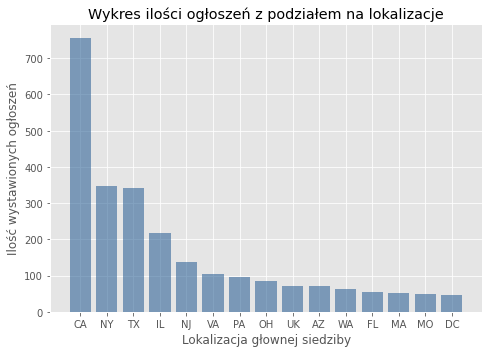

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['CA', 'NY', 'TX', 'IL', 'NJ', 'VA', 'PA', 'OH', 'UK', 'AZ', 'WA', 'FL', 'MA', 'MO', 'DC']
students = [757,347,342,217,138, 104, 97, 85, 70, 70, 62, 55, 53, 48, 47 ]
ax.bar(langs,students, color=(0.2, 0.4, 0.6, 0.6))

plt.xlabel("Lokalizacja głownej siedziby")
plt.ylabel("Ilość wystawionych ogłoszeń")
plt.title("Wykres dla ilości ogłoszeń z podziałem na lokalizacje")

In [ ]:
count_nan = len(data_s['Level of expireince']) - data_s['Level of expireince'].count()
print(count_nan)
# data_s['Level of expireince'].value_counts(null)
# data_s['arena of science'].value_counts(null)

0


In [ ]:
job_list = []
for i in data_s['Job Title']:
    job_list.append(i) 
print('With duplicate: ' + str(len(job_list)))
job_list = list(dict.fromkeys(job_list))

print('Without duplicate: ' + str(len(job_list)))
print(job_list)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data_set = data_s.drop(['Salary Estimate', 'Description', 'Rating', 'Company Name', 'Type of ownership', 'Industry', 'Sector', 'SalaryAverage'  ], axis = 1)
X = data_set.copy()
y = data_set.loc[:,['Maximum Salary']].to_numpy()

print(data_set.shape)
print(X.shape)
print(y.shape)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
X.head()

In [ ]:
descrition_df = data_s.drop(['Job Title', 'Location','Headquarters','Founded', 'Minimum Salary', 'Maximum Salary',  'Location', 'Size', 'SalaryAverage' ,'Salary Estimate', 'Rating', 'Company Name', 'Type of ownership', 'Industry', 'Sector'  ], axis = 1)
print(len(descrition_df))

In [ ]:
!pip3 install scikit-learn
!pip install stop-words
!pip install snowballstemmer
!pip inaall snowballstemmer

NLP for descrition

In [ ]:
print(descrition_df.head(25))

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from stop_words import get_stop_words
import snowballstemmer

stop_words = get_stop_words('en')
stop_words = get_stop_words('english')
stop_words.extend(['.', ',', '"', "'", ':', ';', '(', ')', '[', ']', '{', '}'])

# countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
# tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

stemmer = snowballstemmer.stemmer('english');

vectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
X = vectorizer.fit_transform(descrition_df)
vectorizer.get_feature_names_out()

print(X.shape)
